In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [2]:
iris = pd.read_csv("C:/tel dataset/CodSoft/IRIS.csv")
print(iris.describe(),"\n\n****************************************************************\n")
print(iris.info(),"\n\n*************************************************************\n")
print("Shape of iris dataset is:",iris.shape)
iris

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000 

****************************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-nul

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
print("Columns of iris dateset are:\n",iris.columns)

Columns of iris dateset are:
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [4]:
iris.value_counts("species")

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<b>It is a balanced dataset as the number of data points for every class is equal.</b>

# Exploratory Data Analysis

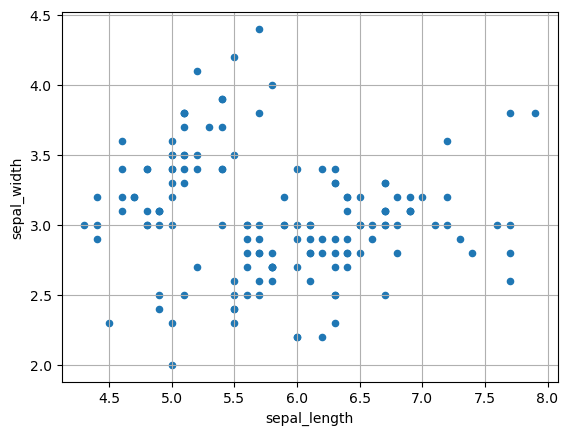

In [5]:
iris.plot(kind="scatter",x="sepal_length",y="sepal_width",grid=True)
plt.show()

C:\Users\venkatesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


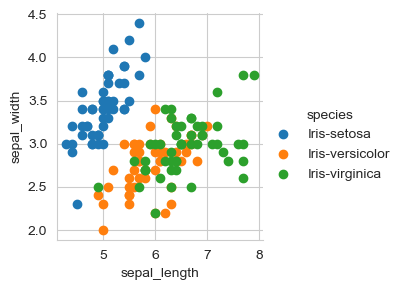

In [6]:
sns.set_style('whitegrid')
sns.FacetGrid(iris,hue="species") \
    .map(plt.scatter,'sepal_length','sepal_width') \
    .add_legend()
plt.show()

# Observations:
&emsp;&emsp;&emsp;<b>1.</b>Using sepal_length and sepal_width,we can distinguish setosa flowers from others.<br>
&emsp;&emsp;&emsp;<b>2.</b>Seperating versicolor from virginica is much harder as they have considerable overlap

C:\Users\venkatesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


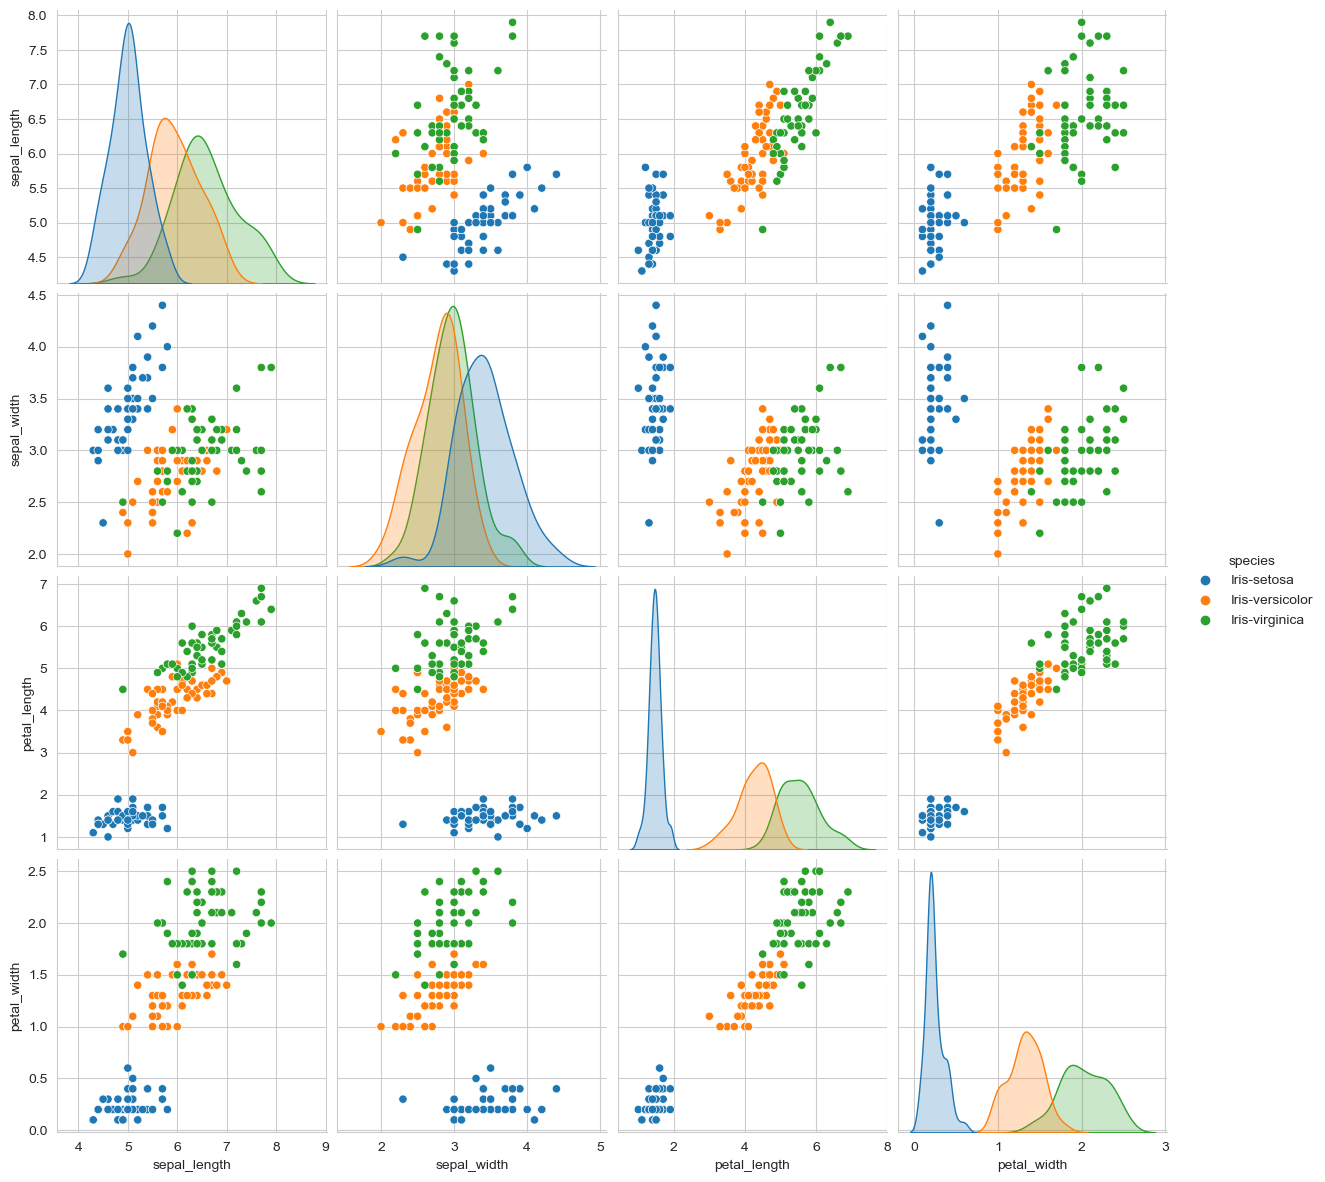

In [7]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(iris,hue="species",height=3)
plt.show()

<b>Observations:</b><br>
&emsp;&emsp;&emsp;<b>1.</b>Petal_length and Petal_width are most useful features to identify various flower types.<br>
&emsp;&emsp;&emsp;<b>2.</b>While Setosa can be easily identified(linearly seperable), virginica and versicolor havesome overlap(almost linearly seperable).<br>

<b>Dividing iris dataset into iris_setosa, iris_virginica and iris_versicolor datasets.</b>

In [8]:
iris_setosa = iris.loc[iris["species"] == "Iris-setosa"]
iris_virginica = iris.loc[iris["species"] == "Iris-virginica"]
iris_versicolor = iris.loc[iris["species"] == "Iris-versicolor"]
print(iris_setosa.shape,iris_virginica.shape,iris_versicolor.shape)

(50, 5) (50, 5) (50, 5)


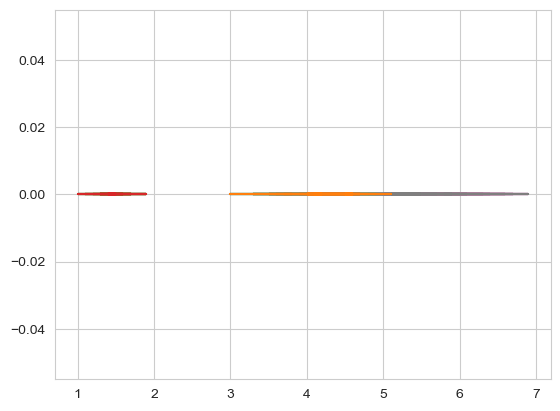

In [9]:
plt.plot(iris_setosa["petal_length"],np.zeros_like(iris_setosa[['petal_length','petal_width','sepal_length','sepal_width']]))
plt.plot(iris_virginica['petal_length'],np.zeros_like(iris_virginica[['petal_length','petal_width','sepal_length','sepal_width']]))
plt.plot(iris_versicolor['petal_length'],np.zeros_like(iris_versicolor[['petal_length','petal_width','sepal_length','sepal_width']]))
plt.show()

# Observations:
&emsp;&emsp;From the above scatter plot we observed that Iris-Setosa flowers can be classified easily i.e., petal length of setosa flowers are lessthan 2.
&emsp;&emsp;

C:\Users\venkatesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


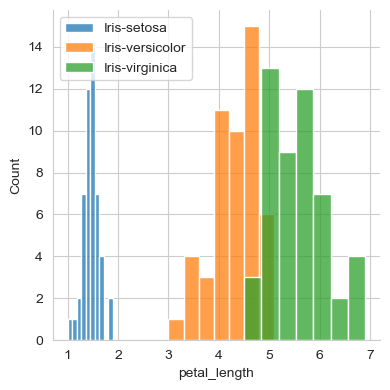

In [10]:
sns.FacetGrid(iris,hue="species",height=4)\
    .map(sns.histplot,"petal_length")
plt.legend()
plt.show()

C:\Users\venkatesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


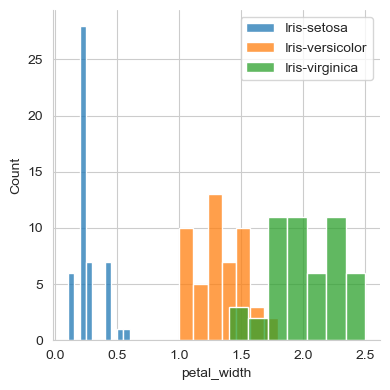

In [11]:
sns.FacetGrid(data=iris,hue="species",height=4)\
    .map(sns.histplot,"petal_width")
plt.legend()
plt.show()

C:\Users\venkatesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


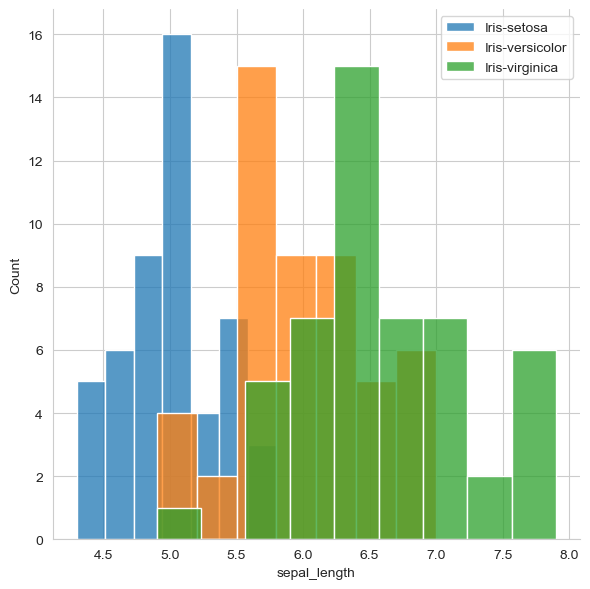

In [12]:
#classification of iris flowers using their sepal length through Histogram

sns.FacetGrid(iris,hue='species',height=6)\
    .map(sns.histplot,"sepal_length")
plt.legend()
plt.show()

C:\Users\venkatesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


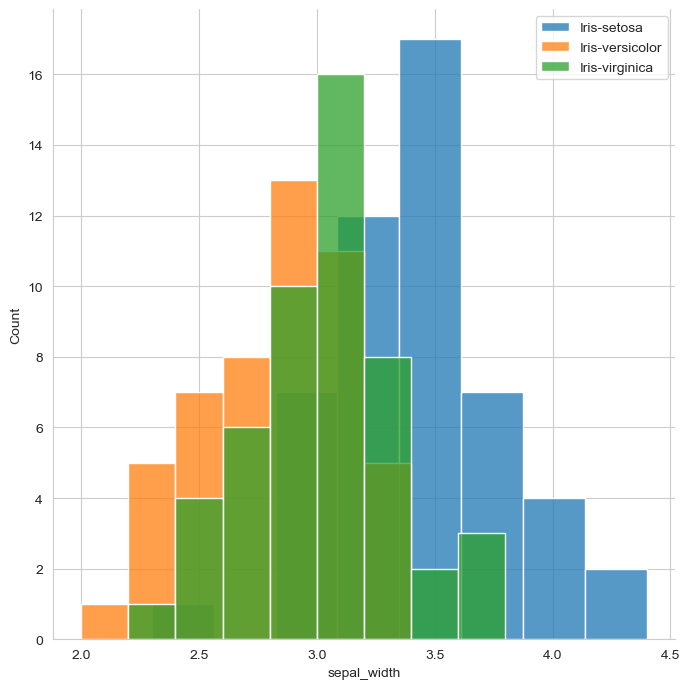

In [13]:
sns.FacetGrid(iris,hue="species",height=7)\
    .map(sns.histplot,"sepal_width")
plt.legend()
plt.show()

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


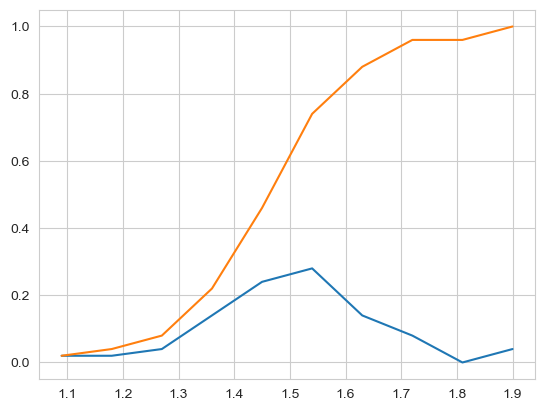

In [14]:
#Probaility Density function and Cummulative Density Function of setosa flowers petal lengths.

counts,bin_edges = np.histogram(iris_setosa['petal_length'],bins=10,
                               density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


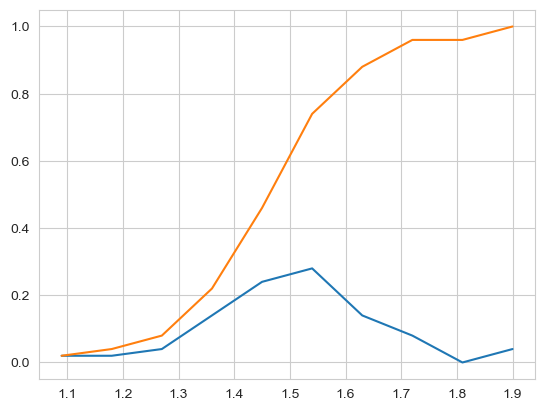

[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


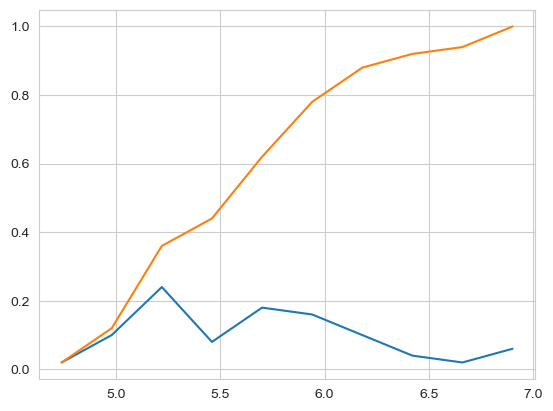

[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


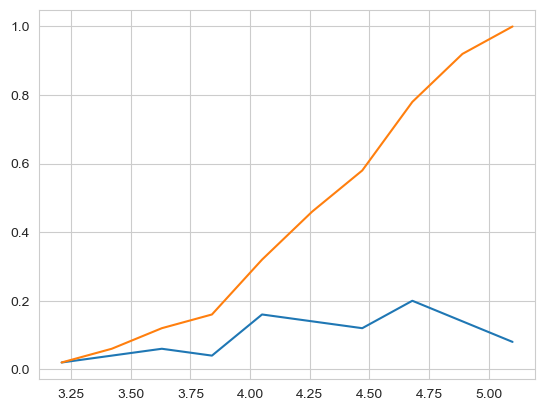

In [15]:
#Setosa

counts,bin_edges = np.histogram(iris_setosa['petal_length'],bins=10,
                               density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

#Virginica
counts,bin_edges = np.histogram(iris_virginica['petal_length'],bins=10,
                               density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

#Versicolor
counts,bin_edges = np.histogram(iris_versicolor['petal_length'],bins=10,
                               density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

In [16]:
print("Mean of setosa flowers petal length :",np.mean(iris_setosa['petal_length']))
print("Mean of virginica flowers petal length:",np.mean(iris_virginica['petal_length']))
print("Mean of versicolor flowers petal length",np.mean(iris_versicolor['petal_length']))

Mean of setosa flowers petal length : 1.464
Mean of virginica flowers petal length: 5.5520000000000005
Mean of versicolor flowers petal length 4.26


In [17]:
print("Median of petal lengths of setosa flowers:",np.median(iris_setosa['petal_length']))
print("Median of petal lengths of virginica flowers:",np.median(iris_virginica['petal_length']))
print("Median of petal lengths of versicolor flowers:",np.median(iris_versicolor['petal_length']))

Median of petal lengths of setosa flowers: 1.5
Median of petal lengths of virginica flowers: 5.55
Median of petal lengths of versicolor flowers: 4.35


<Axes: xlabel='species', ylabel='petal_length'>

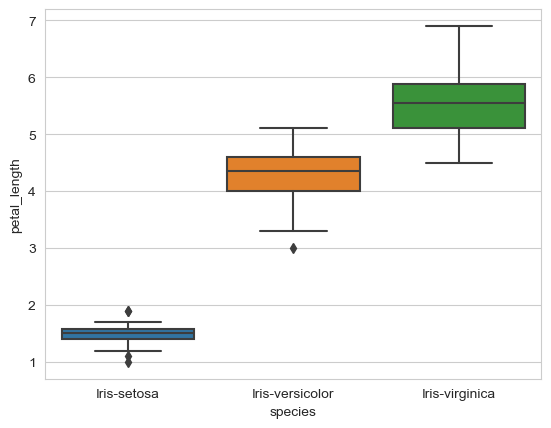

In [18]:
sns.boxplot(data=iris,y="petal_length",x="species")

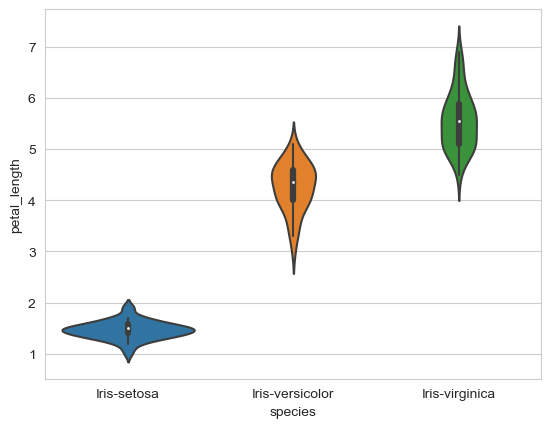

In [19]:
sns.violinplot(x="species",y="petal_length",data=iris,height=8)
plt.show()

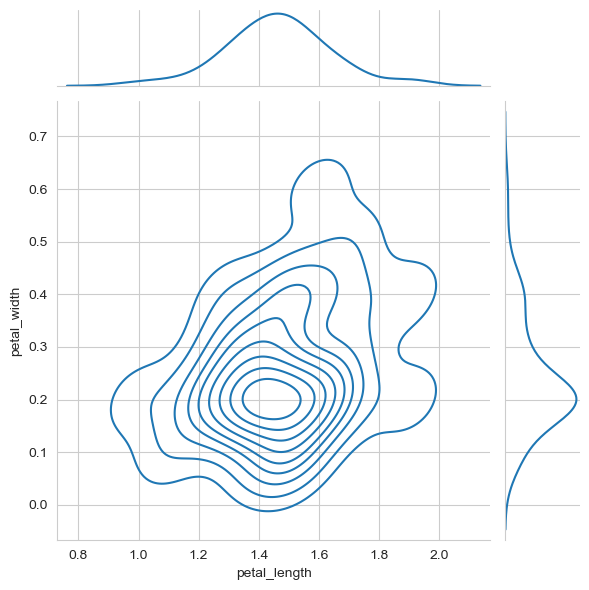

In [20]:
sns.jointplot(x='petal_length',y='petal_width',data=iris_setosa,kind='kde')
plt.show()

In [21]:
print("Iris dataset shape:",iris.shape)

Iris dataset shape: (150, 5)


# <b>Splitting data into Training and Testing datasets</b>

In [32]:
x=iris.drop("species",axis=1)
y=iris['species']

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
print("Independent variables training dataset:")
x_train

Independent variables training dataset:


,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [35]:
print("Dependent variables in iris dataset as testing dataset:")
print(y_train)

Dependent variables in iris dataset as testing dataset:
22         Iris-setosa
15         Iris-setosa
65     Iris-versicolor
11         Iris-setosa
42         Iris-setosa
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: species, Length: 120, dtype: object


# Model selection, Training and Prediction of the model

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

y_prediction = model.predict(x_test)

# Accuracy and Confusion matrix

In [ ]:
accuracy = round(model.score(x_train,y_train)*100,2)
print("Accuracy:",accuracy)

conf_matrix = metrics.confusion_matrix(y_test,y_prediction)
print("Confusion Matrix:\n",conf_matrix)

In [ ]:
accuracy = round(accuracy_score(y_test,y_prediction)*100,2)

precision = round(precision_score(y_test,y_prediction,average='weighted')*100,2)

recall = round(recall_score(y_test,y_prediction,average='weighted')*100,2)

f1 = round(f1_score(y_test,y_prediction,average='weighted')*100,2)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")